## Covid - Fevereiro 2020 a setembro 2021 em SP

Dados
https://github.com/seade-R/dados-covid-sp

### Seleção dos dados

In [122]:
import pandas as pd
import numpy as np

In [123]:
covid = pd.read_csv('dados_covid_sp.csv', sep=';', encoding="utf-8")

In [124]:
covid .head(5)

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [125]:
covid.shape

(374034, 26)


### Pré-processamento, limpeza e transformação 

##### Altera o nome das colunas

In [126]:
covid.rename(columns={'nome_munic':'Município', 'datahora':'Data'}, inplace=True)

#### Exclui as colunas

In [127]:
covid_alter = covid.drop(columns={'cod_ra'})

In [128]:
covid_alter.head(4)

,Município,codigo_ibge,dia,mes,Data,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9


In [129]:
covid_alter.shape

(374034, 25)

Alterando direto dentro do dataset sem criar cópia

axis = 0 para linhas
axis = 1 para colunas 

O índice da coluna entre colchetes duplos [[1]]

Aqui exclui a coluna/variável pelo índice dela começando em 0


Exclui codigo_ibge


In [130]:
covid_alter = covid_alter.drop(covid_alter.columns[[1]], axis=1)
covid_alter.head(5)

,Município,dia,mes,Data,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


Aqui apaga pelo nome da coluna/variável

In [131]:
covid_alter.drop(columns=['cod_drs', 'map_leg', 'map_leg_s'], inplace=True)
covid_alter.shape

(374034, 21)

#### Altera o valor da área

Aqui altera o valor da variável área, fazendo a divisão por 100


In [132]:
#covid_alter = covid_alter.area / 100 # Das duas formas funciona
covid_alter['area'] = covid_alter['area'] / 100

In [133]:
covid_alter.head(5)

,Município,dia,mes,Data,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,...,obitos_mm7d,letalidade,nome_ra,nome_drs,pop,pop_60,area,latitude,longitude,semana_epidem
0,Adamantina,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,"0,000000000000000","0,000000000000000000",RA de Presidente Prudente,Marília,33894,7398,411.99,"-21,6820","-51,0737",9
1,Adolfo,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,"0,000000000000000","0,000000000000000000",RA de São José do Rio Preto,São José do Rio Preto,3447,761,211.06,"-21,2325","-49,6451",9
2,Aguaí,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,"0,000000000000000","0,000000000000000000",RA de Campinas,São João da Boa Vista,35608,5245,474.55,"-22,0572","-46,9735",9
3,Águas da Prata,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,"0,000000000000000","0,000000000000000000",RA de Campinas,São João da Boa Vista,7797,1729,142.67,"-21,9319","-46,7176",9
4,Águas de Lindóia,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,"0,000000000000000","0,000000000000000000",RA de Campinas,Campinas,18374,3275,60.13,"-22,4733","-46,6314",9


#### Cria coluna

Com base na população / a área se chega na densidade por km²


In [134]:
covid_alter['densidade'] = covid_alter['pop'] / covid_alter['area']
covid_alter.head(5)

,Município,dia,mes,Data,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,...,letalidade,nome_ra,nome_drs,pop,pop_60,area,latitude,longitude,semana_epidem,densidade
0,Adamantina,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,"0,000000000000000000",RA de Presidente Prudente,Marília,33894,7398,411.99,"-21,6820","-51,0737",9,82.268987
1,Adolfo,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,"0,000000000000000000",RA de São José do Rio Preto,São José do Rio Preto,3447,761,211.06,"-21,2325","-49,6451",9,16.331849
2,Aguaí,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,"0,000000000000000000",RA de Campinas,São João da Boa Vista,35608,5245,474.55,"-22,0572","-46,9735",9,75.035297
3,Águas da Prata,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,"0,000000000000000000",RA de Campinas,São João da Boa Vista,7797,1729,142.67,"-21,9319","-46,7176",9,54.650592
4,Águas de Lindóia,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,"0,000000000000000000",RA de Campinas,Campinas,18374,3275,60.13,"-22,4733","-46,6314",9,305.571262


In [135]:
#Alterar o nome da coluna para que o dataset fique mais compreensivel
covid_alter.rename(columns={'densidade':'Densidade /KM²'}, inplace=True)

In [136]:
covid_alter.head(5)

,Município,dia,mes,Data,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,...,letalidade,nome_ra,nome_drs,pop,pop_60,area,latitude,longitude,semana_epidem,Densidade /KM²
0,Adamantina,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,"0,000000000000000000",RA de Presidente Prudente,Marília,33894,7398,411.99,"-21,6820","-51,0737",9,82.268987
1,Adolfo,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,"0,000000000000000000",RA de São José do Rio Preto,São José do Rio Preto,3447,761,211.06,"-21,2325","-49,6451",9,16.331849
2,Aguaí,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,"0,000000000000000000",RA de Campinas,São João da Boa Vista,35608,5245,474.55,"-22,0572","-46,9735",9,75.035297
3,Águas da Prata,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,"0,000000000000000000",RA de Campinas,São João da Boa Vista,7797,1729,142.67,"-21,9319","-46,7176",9,54.650592
4,Águas de Lindóia,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,"0,000000000000000000",RA de Campinas,Campinas,18374,3275,60.13,"-22,4733","-46,6314",9,305.571262


####  Agregação

Quantidade de dias que teve mais do que 10 novos óbitos por dia, classificado por município

In [137]:
#covid_alter.head(5)
covid_alter.query('obitos_novos >10')['Município'].value_counts()

Município
São Paulo                476
Guarulhos                171
Campinas                 166
São Bernardo do Campo    103
Santo André               94
                        ... 
Ipaussu                    1
Santana de Parnaíba        1
Cosmópolis                 1
Tatuí                      1
Andradina                  1
Name: count, Length: 110, dtype: int64

#### Dias com mais do que 1000 casos notificados

In [ ]:
novo_df_covid_ML_covid_ML.query('casos > 1000')['Município'].value_counts()

Município
São Paulo                548
Osasco                   508
Guarulhos                506
São Bernardo do Campo    506
Santo André              501
                        ... 
Queluz                    31
Piratininga               30
Bananal                   26
Ouro Verde                10
São Simão                  5
Name: count, Length: 383, dtype: int64

### Mineração dos dados

#### Bibliotecas

In [139]:
import matplotlib.pyplot as plt

#### Município com mais casos

Traz os municípios que tiveram maior número de cassos novos no estado de SP

In [140]:
# Agrupa por Município
tt_municipio = covid_alter.groupby('Município' , as_index=False).agg(
    Total_municipio = ("casos_novos",'sum')# sumarisa os novos cassos 
    #Densidade = ('Densidade /KM²', 'first')# pega a primeira densidade de cada municipio
)

# Ordenar do maior para o menor
totais = tt_municipio.sort_values(by="Total_municipio", ascending=False).head(10)

print(totais.head(10))  # mostra os 10 primeiros

                 Município  Total_municipio
573              São Paulo           962013
100               Campinas           112841
563  São José do Rio Preto            94976
564    São José dos Campos            92054
480         Ribeirão Preto            83090
549               Sorocaba            76950
555  São Bernardo do Campo            75706
529            Santo André            65331
428             Piracicaba            63932
204              Guarulhos            63398


Plota o grafico

<function matplotlib.pyplot.show(close=None, block=None)>

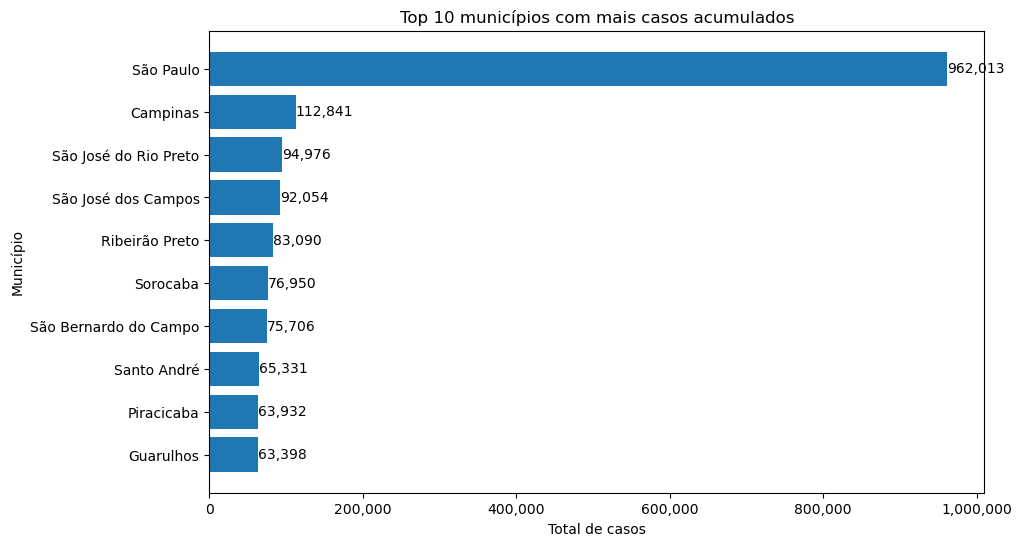

In [141]:
import matplotlib.ticker as mtick

plt.figure(figsize=(10,6))
barras = plt.barh(totais["Município"], totais['Total_municipio'])
plt.xlabel('Total de casos')
plt.ylabel('Município')
plt.title('Top 10 municípios com mais casos acumulados')
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.gca().invert_yaxis()
# Adicionando rótulos de valores
for bar in barras:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, f'{int(width):,}', va='center')
plt.show

SP é de longe o município com maior discrepancia

#### Município com maior média diária de obitos

In [142]:
covid_alter.head(5)

,Município,dia,mes,Data,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,...,letalidade,nome_ra,nome_drs,pop,pop_60,area,latitude,longitude,semana_epidem,Densidade /KM²
0,Adamantina,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,"0,000000000000000000",RA de Presidente Prudente,Marília,33894,7398,411.99,"-21,6820","-51,0737",9,82.268987
1,Adolfo,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,"0,000000000000000000",RA de São José do Rio Preto,São José do Rio Preto,3447,761,211.06,"-21,2325","-49,6451",9,16.331849
2,Aguaí,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,"0,000000000000000000",RA de Campinas,São João da Boa Vista,35608,5245,474.55,"-22,0572","-46,9735",9,75.035297
3,Águas da Prata,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,"0,000000000000000000",RA de Campinas,São João da Boa Vista,7797,1729,142.67,"-21,9319","-46,7176",9,54.650592
4,Águas de Lindóia,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,"0,000000000000000000",RA de Campinas,Campinas,18374,3275,60.13,"-22,4733","-46,6314",9,305.571262


In [143]:
# Agrupa por Município uma contagem de registros, e o total de óbitos e dividir um pelo outro
Média_municipio = covid_alter.groupby('Município' , as_index=False).agg(
    obitos_novos = ("obitos_novos",'sum'),# sumarisa os novos cassos 
    dias_tt = ('Data', 'count')# pega a primeira densidade de cada municipio
)

# Ordenar do maior para o menor
totais = Média_municipio.sort_values(by="obitos_novos", ascending=False).head(10)
totais['Média_dia'] = totais['obitos_novos'] / totais['dias_tt']
print(totais.head(10))  # mostra os 10 primeiros

                 Município  obitos_novos  dias_tt  Média_dia
573              São Paulo         38001      579  65.632124
204              Guarulhos          4866      579   8.404145
100               Campinas          4471      579   7.721934
555  São Bernardo do Campo          3257      579   5.625216
529            Santo André          3074      579   5.309154
480         Ribeirão Preto          2929      579   5.058722
549               Sorocaba          2819      579   4.868739
563  São José do Rio Preto          2786      579   4.811744
382                 Osasco          2602      579   4.493955
536                 Santos          2133      579   3.683938


<function matplotlib.pyplot.show(close=None, block=None)>

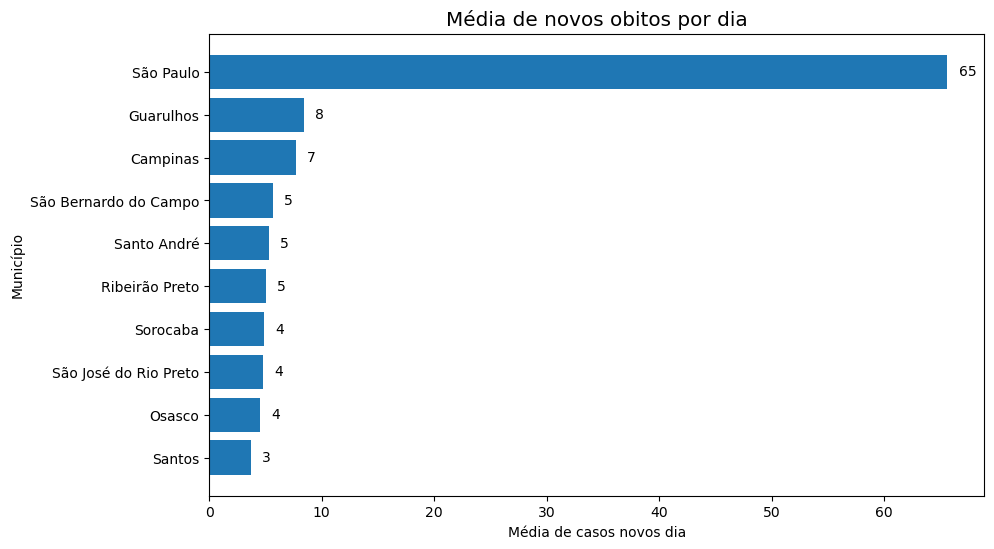

In [144]:
plt.figure(figsize=(10,6))
barras_media = plt.barh(totais["Município"], totais['Média_dia'])
plt.xlabel('Média de casos novos dia')
plt.ylabel('Município')
plt.title('Média de novos obitos por dia').set_fontsize('x-large')
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.gca().invert_yaxis()
# Adicionando rótulos de valores
for bar in barras_media:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, f'{int(width):,}', va='center')
plt.show

    SP continua sendo a que tem maior número de casos

#### Correlação entre a densidade populacional, obitos e novos casos

A seguir será calculado os valores de r e p-valor, onde:

R é o coeficiente de correlação de Pearson em que r mede a força e o direção da relação entre as variáveis

r = +1.0: Correlação positiva perfeita (quando uma sobe, a outra sobe proporcionalmente)
r = 0.0: Sem correlação linear (não há relação linear)
r = -1.0: Correlação negativa perfeita (quando uma sobe, a outra desce proporcionalmente)

P-valor é a siginificância estatística da variável

p < 0.001: Altamente significativo (***) - Confiança > 99.9%
p < 0.01: Muito significativo (**) - Confiança > 99%
p < 0.05: Significativo (*) - Confiança > 95%
p > 0.05: Não significativo - Pode ser apenas acaso


In [145]:
import seaborn as sns
from scipy.stats import pearsonr

def analise_densidade_covid(df):
    """
    Análise simples da relação entre densidade populacional e COVID-19
    """
    
    # 1. Agregar dados por município
    municipios = df.groupby('Município').agg({
        'obitos_novos': 'sum',           # Total de óbitos
        'casos_novos': 'sum',            # Total de casos
        'Densidade /KM²': 'first'        # Densidade (constante por município)
    }).reset_index()
    
    # Renomear colunas
    municipios.columns = ['Município', 'total_obitos', 'total_casos', 'densidade']
    
    # Remover valores nulos ou zeros
    municipios = municipios.dropna()
    municipios = municipios[municipios['densidade'] > 0]
    
    # 2. Calcular correlações
    corr_obitos, p_obitos = pearsonr(municipios['densidade'], municipios['total_obitos'])
    corr_casos, p_casos = pearsonr(municipios['densidade'], municipios['total_casos'])
    
    # 3. Visualizar resultados
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Gráfico 1: Densidade vs Óbitos
    ax1.scatter(municipios['densidade'], municipios['total_obitos'], alpha=0.6)
    ax1.set_xlabel('Densidade Populacional (/km²)')
    ax1.set_ylabel('Total de Óbitos')
    ax1.set_title(f'Densidade vs Óbitos\nCorrelação: {corr_obitos:.3f} (p={p_obitos:.3f})')
    
    # Gráfico 2: Densidade vs Casos
    ax2.scatter(municipios['densidade'], municipios['total_casos'], alpha=0.6, color='orange')
    ax2.set_xlabel('Densidade Populacional (/km²)')
    ax2.set_ylabel('Total de Casos')
    ax2.set_title(f'Densidade vs Casos\nCorrelação: {corr_casos:.3f} (p={p_casos:.3f})')
    
    plt.tight_layout()
    plt.show()
    
    # 4. Resultados
    print("="*50)
    print("CORRELAÇÃO: DENSIDADE vs COVID-19")
    print("="*50)
    print(f"Densidade vs Óbitos:  r = {corr_obitos:+.3f}, p = {p_obitos:.3f}")
    print(f"Densidade vs Casos:   r = {corr_casos:+.3f}, p = {p_casos:.3f}")
    print("\nInterpretação:")
    print("- r > 0: correlação positiva (mais densidade = mais casos/óbitos)")
    print("- r < 0: correlação negativa (mais densidade = menos casos/óbitos)")  
    print("- p < 0.05: correlação significativa")
    
    return municipios

# resultado = analise_densidade_covid(covid_alter)


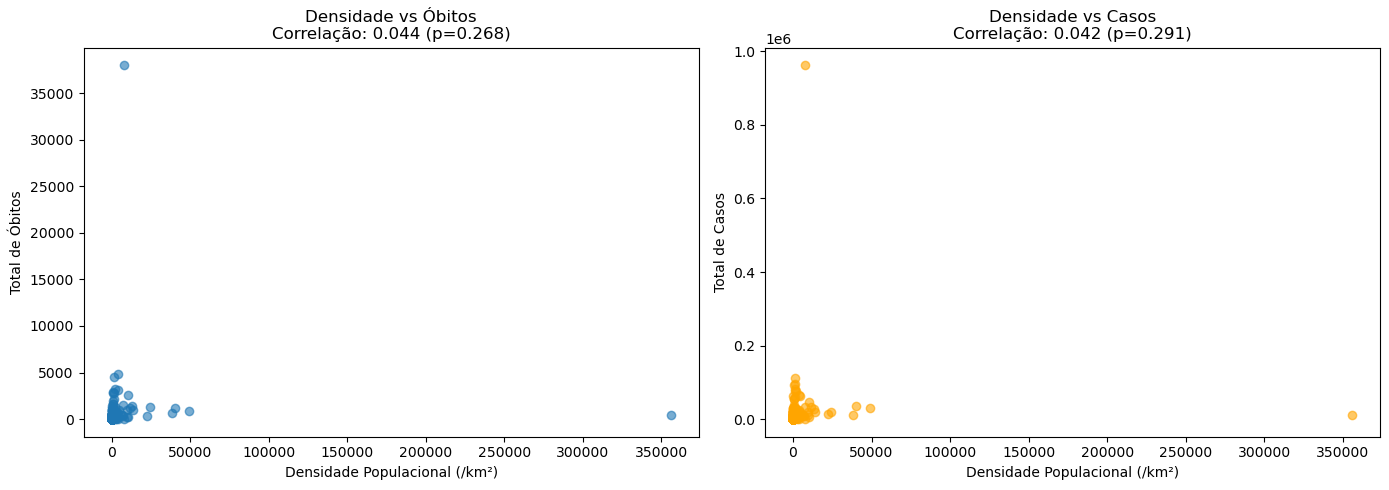

CORRELAÇÃO: DENSIDADE vs COVID-19
Densidade vs Óbitos:  r = +0.044, p = 0.268
Densidade vs Casos:   r = +0.042, p = 0.291

Interpretação:
- r > 0: correlação positiva (mais densidade = mais casos/óbitos)
- r < 0: correlação negativa (mais densidade = menos casos/óbitos)
- p < 0.05: correlação significativa


In [146]:
resultado = analise_densidade_covid(covid_alter)

A densidade populacional não explica a alta de novos casos e de obitos na cidade de SP

#### Matriz correlacional

Visto que a densidade populacional não explica a divergencia de SP para outros municipios, outros fatores devem estar por traz deste fenômeno

Um bom indício pode ser encontrado na matriz de correlação

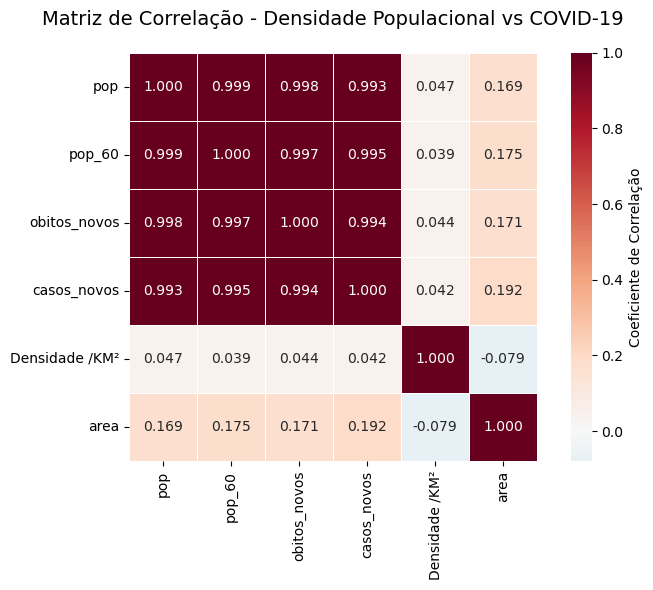

Matriz de Correlação:
                  pop  pop_60  obitos_novos  casos_novos  Densidade /KM²  \
pop             1.000   0.999         0.998        0.993           0.047   
pop_60          0.999   1.000         0.997        0.995           0.039   
obitos_novos    0.998   0.997         1.000        0.994           0.044   
casos_novos     0.993   0.995         0.994        1.000           0.042   
Densidade /KM²  0.047   0.039         0.044        0.042           1.000   
area            0.169   0.175         0.171        0.192          -0.079   

                 area  
pop             0.169  
pop_60          0.175  
obitos_novos    0.171  
casos_novos     0.192  
Densidade /KM² -0.079  
area            1.000  


In [147]:

# Prepara o dataset Municípios
municipios = covid_alter.groupby('Município').agg(
    {
        'pop': 'first',
        'pop_60': 'sum', 
        'obitos_novos': 'sum', 
        'casos_novos': 'sum', 
        'Densidade /KM²': 'first',
        'area': 'first'
        }
        ).reset_index()

# Selecionar apenas colunas numéricas para correlação

cols_numericas = ['pop','pop_60',  'obitos_novos', 'casos_novos', 'Densidade /KM²','area']  

# Calcular matriz de correlação
matriz_corr = municipios[cols_numericas].corr()

# Criar o heatmap/mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, 
            annot=True,          # Mostrar valores numéricos
            cmap='RdBu_r',       # Escala de cores (vermelho-branco-azul)
            center=0,            # Centralizar em zero
            square=True,         # Células quadradas
            linewidths=0.5,      # Espessura das linhas
            fmt='.3f',           # Formato dos números (3 casas decimais)
            cbar_kws={'label': 'Coeficiente de Correlação'})

plt.title('Matriz de Correlação - Densidade Populacional vs COVID-19', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Mostrar valores exatos
print("Matriz de Correlação:")
print(matriz_corr.round(3))

### Interpretação
A variável de densidade populacional não agrega nos dados analizados.

Mas o total da população sim.

        Quantos mais idosos mais obitos.

        Quanto mais casos mais obitos. 

São evidencias que estão de acordo com as observações impíricas acerca do assunto, porém valida o dataset para partir para mais análises.

Proximos possíveis ppontos de  análise:

    -Quantidades de hospitais município;

    -Capacidade hospitalar por município.(leitos de UTI por exemplo)

    -Valor investido em Saúde(Por habitante) por município;

    -Valor investido em UTI(Por habitante) por município; 

    -Dados socioeconomicos dos municípios;



Obs: Eu deveria ter começado pela matriz correlacional.

## Introdução de aprendizado de máquina

### Novo DataFrame dos dados identificados na matriz de correlação

In [148]:
covid_alter.head(5)

,Município,dia,mes,Data,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,...,letalidade,nome_ra,nome_drs,pop,pop_60,area,latitude,longitude,semana_epidem,Densidade /KM²
0,Adamantina,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,"0,000000000000000000",RA de Presidente Prudente,Marília,33894,7398,411.99,"-21,6820","-51,0737",9,82.268987
1,Adolfo,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,"0,000000000000000000",RA de São José do Rio Preto,São José do Rio Preto,3447,761,211.06,"-21,2325","-49,6451",9,16.331849
2,Aguaí,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,"0,000000000000000000",RA de Campinas,São João da Boa Vista,35608,5245,474.55,"-22,0572","-46,9735",9,75.035297
3,Águas da Prata,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,"0,000000000000000000",RA de Campinas,São João da Boa Vista,7797,1729,142.67,"-21,9319","-46,7176",9,54.650592
4,Águas de Lindóia,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,"0,000000000000000000",RA de Campinas,Campinas,18374,3275,60.13,"-22,4733","-46,6314",9,305.571262


In [170]:
#formata os dados
covid_alter['Data'] = pd.to_datetime(covid_alter['Data'],  format='%d/%m/%Y')
#covid_alter['Data'] = covid_alter['Data'].dt.strftime('%Y/%m/%d')
covid_alter.head(5)


,Município,dia,mes,Data,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,...,nome_ra,nome_drs,pop,pop_60,area,latitude,longitude,semana_epidem,Densidade /KM²,Data_formatada
0,Adamantina,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,RA de Presidente Prudente,Marília,33894,7398,411.99,"-21,6820","-51,0737",9,82.268987,25/02/2020
1,Adolfo,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,RA de São José do Rio Preto,São José do Rio Preto,3447,761,211.06,"-21,2325","-49,6451",9,16.331849,25/02/2020
2,Aguaí,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,RA de Campinas,São João da Boa Vista,35608,5245,474.55,"-22,0572","-46,9735",9,75.035297,25/02/2020
3,Águas da Prata,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,RA de Campinas,São João da Boa Vista,7797,1729,142.67,"-21,9319","-46,7176",9,54.650592,25/02/2020
4,Águas de Lindóia,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,...,RA de Campinas,Campinas,18374,3275,60.13,"-22,4733","-46,6314",9,305.571262,25/02/2020


In [181]:
colunas_desejadas = ['Município', 'Data', 'casos_novos', 'obitos_novos', 'pop', 'pop_60', 'Densidade /KM²']
df_covid_ML = covid_alter[colunas_desejadas].copy()
df_covid_ML.head(5)

,Município,Data,casos_novos,obitos_novos,pop,pop_60,Densidade /KM²
0,Adamantina,2020-02-25,0,0,33894,7398,82.268987
1,Adolfo,2020-02-25,0,0,3447,761,16.331849
2,Aguaí,2020-02-25,0,0,35608,5245,75.035297
3,Águas da Prata,2020-02-25,0,0,7797,1729,54.650592
4,Águas de Lindóia,2020-02-25,0,0,18374,3275,305.571262


In [182]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# ============================================================================
# RANDOM FOREST - MELHOR MODELO PARA COVID-19
# ============================================================================

def modelo_covid_random_forest(df):
    """
    Random Forest: Melhor modelo para prever casos de COVID-19
    - Lida bem com outliers
    - Captura relações não-lineares
    - Robusto e confiável
    """
    
    print("🤖 TREINANDO RANDOM FOREST...")
    
    # 1. Preparar dados (agregar por município)
    municipios = df.groupby('Município').agg({
        'casos_novos': 'sum',
        'obitos_novos': 'sum',
        'pop': 'first',
        'pop_60': 'first',
        'Densidade /KM²': 'first'
    }).reset_index()
    
    # Renomear colunas
    municipios.columns = ['Município', 'total_casos', 'total_obitos', 'pop', 'pop_60', 'densidade']
    municipios = municipios.dropna()
    
    # 2. Definir variáveis
    X = municipios[['pop', 'pop_60', 'densidade']]  # Variáveis explicativas
    y = municipios['total_casos']                    # Variável a prever
    
    # 3. Dividir treino e teste (80% treino, 20% teste)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # 4. Treinar o modelo
    modelo = RandomForestRegressor(n_estimators=100, random_state=42)
    modelo.fit(X_train, y_train)
    
    # 5. Fazer previsões
    y_pred = modelo.predict(X_test)
    
    # 6. Avaliar performance
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # 7. Mostrar resultados
    print("="*50)
    print("🎯 RESULTADOS DO MODELO")
    print("="*50)
    print(f"R² Score: {r2:.3f} ({'Excelente' if r2 > 0.8 else 'Bom' if r2 > 0.6 else 'Regular' if r2 > 0.4 else 'Ruim'})")
    print(f"Erro Médio: {mae:,.0f} casos")
    print(f"Erro Quadrático: {rmse:,.0f} casos")
    
    # 8. Importância das variáveis
    importancias = pd.DataFrame({
        'Variável': ['População Total', 'População 60+', 'Densidade'],
        'Importância': modelo.feature_importances_
    }).sort_values('Importância', ascending=False)
    
    print(f"\n📊 IMPORTÂNCIA DAS VARIÁVEIS:")
    for _, row in importancias.iterrows():
        porcentagem = row['Importância'] * 100
        print(f"{row['Variável']}: {porcentagem:.1f}%")
    
    # 9. Visualização
    plt.figure(figsize=(10, 6))
    
    # Subplot 1: Previsões vs Realidade
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Casos Reais')
    plt.ylabel('Casos Previstos')
    plt.title(f'Previsões vs Realidade\nR² = {r2:.3f}')
    plt.grid(True, alpha=0.3)
    
    # Subplot 2: Importância das Variáveis
    plt.subplot(1, 2, 2)
    plt.barh(importancias['Variável'], importancias['Importância'] * 100, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    plt.xlabel('Importância (%)')
    plt.title('Importância das Variáveis')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 10. Interpretação
    print(f"\n💡 INTERPRETAÇÃO:")
    if r2 > 0.8:
        print("✅ Modelo EXCELENTE! Consegue prever casos com alta precisão.")
    elif r2 > 0.6:
        print("✅ Modelo BOM! Previsões confiáveis na maioria dos casos.")
    elif r2 > 0.4:
        print("⚠️ Modelo REGULAR. Pode ser melhorado com mais variáveis.")
    else:
        print("❌ Modelo com dificuldades. Precisa de mais dados ou variáveis.")
    
    print(f"📈 A variável mais importante é: {importancias.iloc[0]['Variável']}")
    
    # 11. Exemplo de previsão
    print(f"\n🔮 EXEMPLO DE PREVISÃO:")
    exemplo = [[100000, 15000, 5000]]  # pop, pop_60, densidade
    pred_exemplo = modelo.predict(exemplo)
    print(f"Município com 100mil hab, 15mil idosos, densidade 5mil/km²:")
    print(f"Casos previstos: {pred_exemplo[0]:,.0f}")
    
    return modelo, municipios, importancias

# ============================================================================
# COMO USAR:
# ============================================================================

# modelo, dados, importancias = modelo_covid_random_forest(covid_alter)

🤖 TREINANDO RANDOM FOREST...
🎯 RESULTADOS DO MODELO
R² Score: 0.816 (Excelente)
Erro Médio: 1,267 casos
Erro Quadrático: 3,449 casos

📊 IMPORTÂNCIA DAS VARIÁVEIS:
População 60+: 59.7%
População Total: 39.7%
Densidade: 0.6%


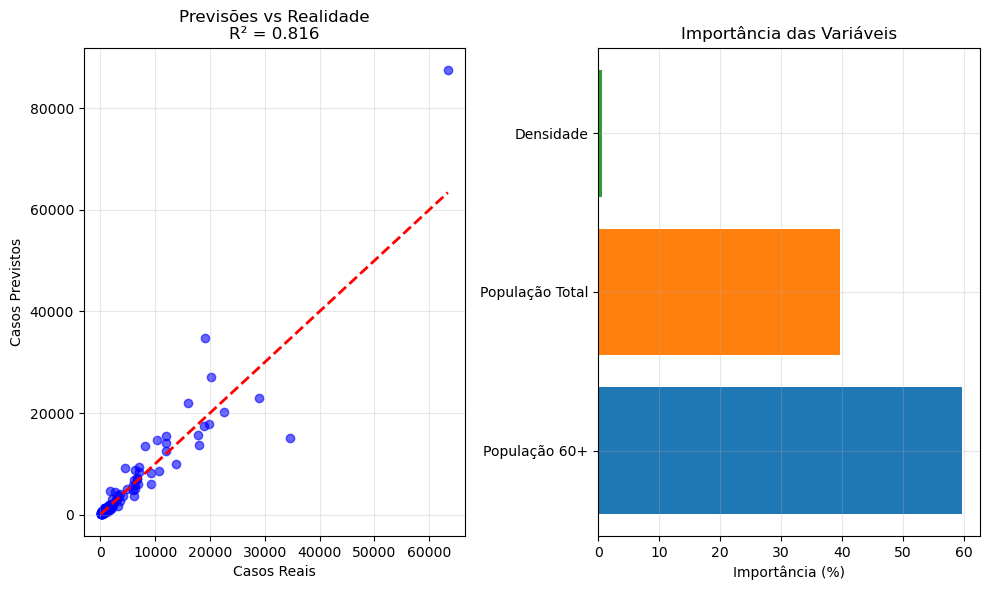


💡 INTERPRETAÇÃO:
✅ Modelo EXCELENTE! Consegue prever casos com alta precisão.
📈 A variável mais importante é: População 60+

🔮 EXEMPLO DE PREVISÃO:
Município com 100mil hab, 15mil idosos, densidade 5mil/km²:
Casos previstos: 9,447


c:\Users\guico\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [183]:
#modelo_covid_random_forest(df_covid_ML)
modelo, dados, importancias = modelo_covid_random_forest(df_covid_ML)